In [1]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 기본 테마 설정
# https://coldbrown.co.kr/2023/07/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8B%A4%EC%A0%84%ED%8E%B8-08-seaborn-sns-set%EC%9D%84-%ED%86%B5%ED%95%B4-%EC%8A%A4%ED%83%80%EC%9D%BC-%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats

In [13]:
mpg_df = pd.read_excel('data/mpg.xlsx')
# Unnamed: 0 컬럼은 0부터 1씩 증가되는 값이 있는 컬럼이다.
# 그냥 제거한다.
mpg_df.drop('Unnamed: 0', axis=1, inplace=True)
mpg_df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


<class 'pandas.core.series.Series'>


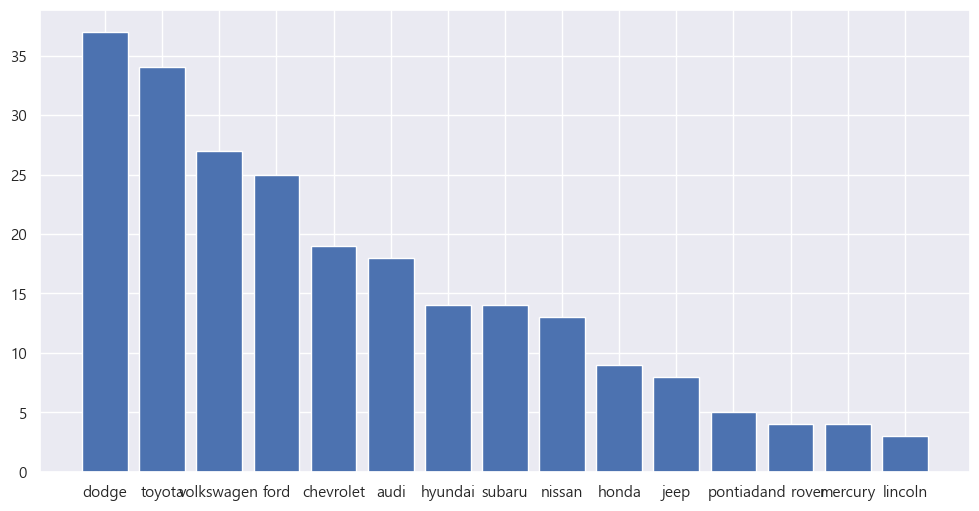

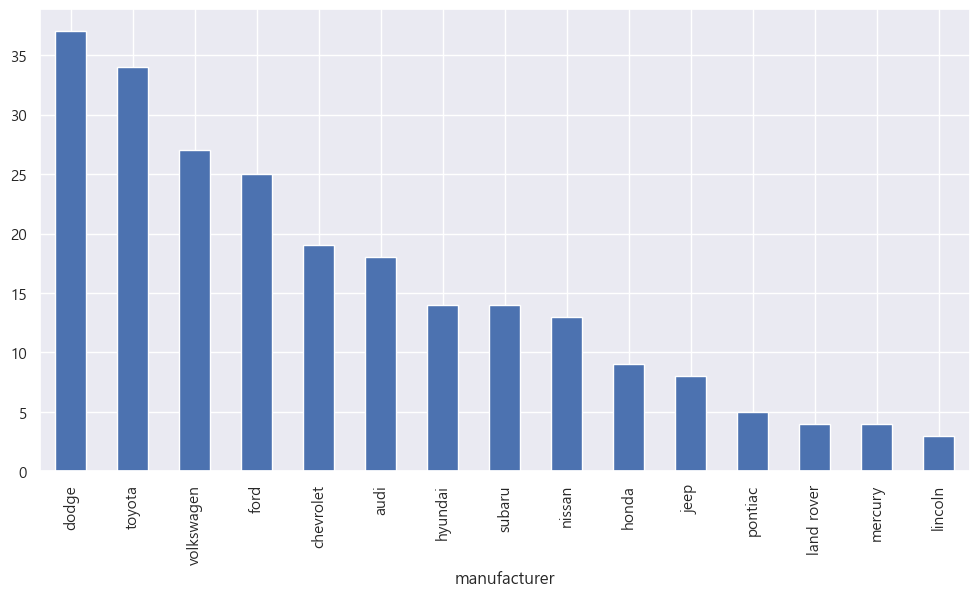

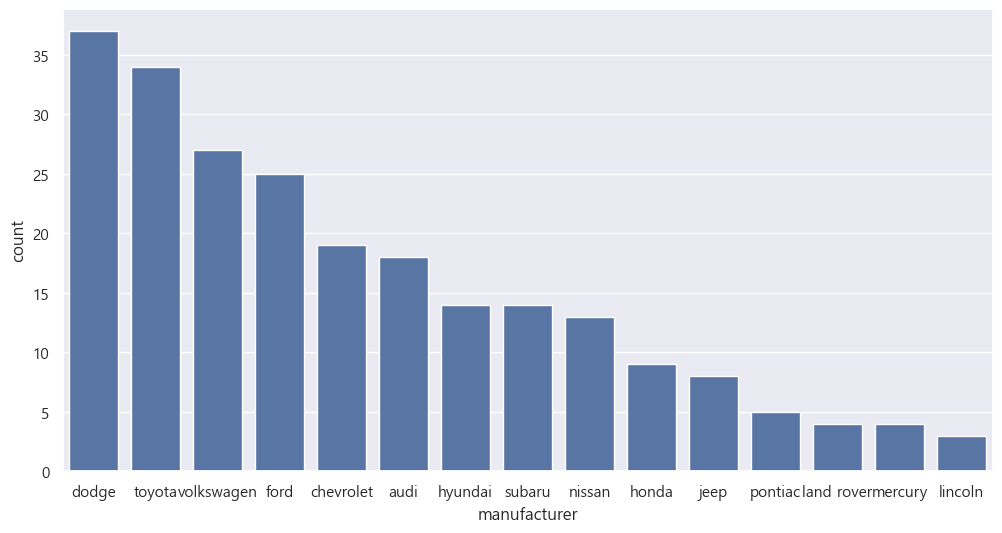

In [23]:
# 도수분포를 확인한다.
mpg_df['manufacturer'].value_counts()
# 도수분포를 확인한다.
manufacturer_frequency_distribution = mpg_df['manufacturer'].value_counts()
# 막대그래프로 각 브랜드별 자동차 수를 비교해 본다.
# matplotlib
# 자동차 회사를 x 축으로
print(type(manufacturer_frequency_distribution))
x = manufacturer_frequency_distribution.index
# 자동차 회사별 자동차 수를 y 축으로
y = manufacturer_frequency_distribution.values
plt.bar(x, y)
plt.show()
# pandas
manufacturer_frequency_distribution.plot.bar()
plt.show()

# seaborn
order = manufacturer_frequency_distribution.index
sns.countplot(data=mpg_df, x='manufacturer', order=order)
plt.show()

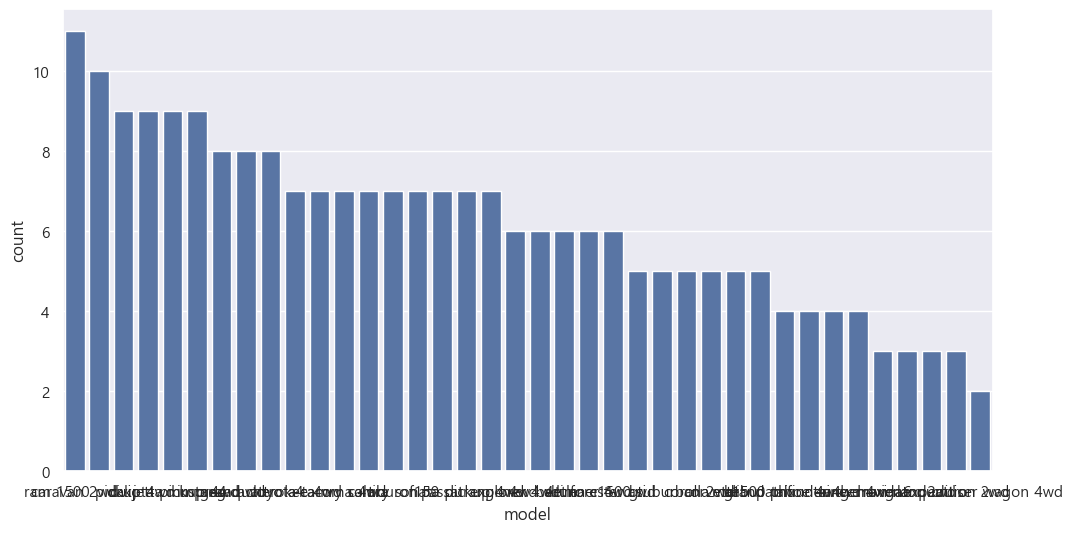

In [27]:
# 도수분포 확인
model_frequency_distribution = mpg_df['model'].value_counts()
model_frequency_distribution
# seaborn
order = model_frequency_distribution.index
sns.countplot(data=mpg_df, x='model', order=order)
plt.show()

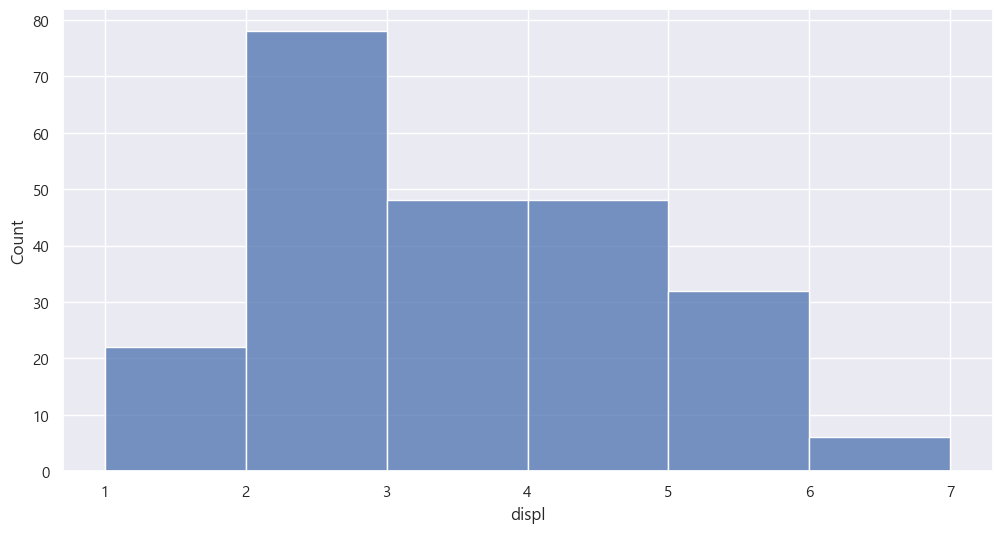

In [33]:
# 히스토그램 계급을 결정하기 위한 최대와 최소를 확인한다.
mpg_df['displ'].agg(['min', 'max'])
# 최소가 1.6이고 최대가 7.0 이므로 1.0 ~ 7.0의 범위로 잡고 1.0 씩 계급을 나눈다.
a1 = np.arange(1, 8)
# 히스토그램
a2 = np.histogram(mpg_df['displ'], bins=a1)
# 히스토그램 시각화
sns.histplot(data=mpg_df, x='displ', bins=a1)
plt.show()

In [35]:
# 변속기에 대해 수동과 자동값이 담겨져 있는 파생변수를 생성한다.
# 변속기의 종류를 담는 리스트
trans_type = []
for a1 in mpg_df['trans'] :
    if a1.startswith('auto') :
        trans_type.append('auto')
    else :
        trans_type.append('manual')

mpg_df['trans_type'] = trans_type
mpg_df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,trans_type
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,auto
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,manual
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,manual
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,auto
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,auto
...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,auto
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,manual
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,auto
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,manual


In [37]:
# 범주형 컬럼들에 대한 도수분포
a1 = mpg_df['year'].value_counts()
a2 = mpg_df['cyl'].value_counts()
a3 = mpg_df['trans'].value_counts()
a4 = mpg_df['drv'].value_counts()
a5 = mpg_df['fl'].value_counts()
a6 = mpg_df['class'].value_counts()
a7 = mpg_df['trans_type'].value_counts()

print('제조년도')
display(a1)
print('-' * 30)
print('실린더개수')
display(a2)
print('-' * 30)
print('변속기 종류')
display(a3)
print('-' * 30)
print('구동방식')
display(a4)
print('-' * 30)
print('연료종류')
display(a5)
print('-' * 30)
print('자동차 종류')a = df1[df1['year'].isin([2008, 1999])]
display(a6)
print('-' * 30)
print('변속 방식')
display(a7)
print('-' * 30)

제조년도


year
1999    117
2008    117
Name: count, dtype: int64

------------------------------
실린더개수


cyl
4    81
6    79
8    70
5     4
Name: count, dtype: int64

------------------------------
변속기 종류


trans
auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: count, dtype: int64

------------------------------
구동방식


drv
f    106
4    103
r     25
Name: count, dtype: int64

------------------------------
연료종류


fl
r    168
p     52
e      8
d      5
c      1
Name: count, dtype: int64

------------------------------
자동차 종류


class
suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: count, dtype: int64

------------------------------
변속 방식


trans_type
auto      157
manual     77
Name: count, dtype: int64

------------------------------


In [119]:
x=mpg_df.groupby(['manufacturer','year','class']).size()
x.columns=['수']
x

manufacturer  year  class     
audi          1999  compact       8
                    midsize       1
              2008  compact       7
                    midsize       2
chevrolet     1999  2seater       2
                                 ..
volkswagen    1999  midsize       4
                    subcompact    4
              2008  compact       6
                    midsize       3
                    subcompact    2
Length: 61, dtype: int64

- 이 데이터는 미국에서 생산된 자동차와 관련된 데이터이다.
- Unnamed: 0 : 의미가 없는 데이터. 0부터 1씩 증가되는 값으로 구성되어 있다.
- manufacturer : 자동차 제조사
- model : 자동차 모델명
- displ : 배기량
- year : 제조년도
- cyl : 실린더 수
- trans : 변속기 종류
- drv : 구동 방식 (f = 전륜구동, r = 후륜구동, 4 = 사륜구동)
- cty : 도시 연비
- hwy : 고속도로 연비
- fl : 연료 종류 (c : 가스, d : 디젤, e : 에탄올 혼합연료, p : 고급 휘발유, r : 일반 휘발유)
- class : 자동차 종류

In [41]:
mpg_df.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class', 'trans_type'],
      dtype='object')

<Axes: xlabel='year', ylabel='displ'>

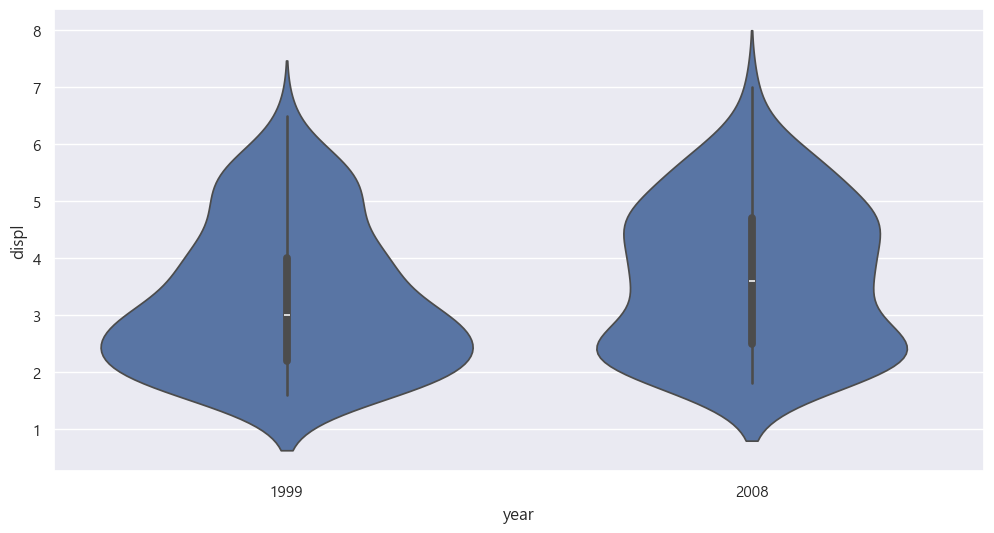

In [101]:
df1=mpg_df[['year','displ']]

a = df1[df1['year'].isin([2008, 1999])]
sns.violinplot(x='year',y='displ',data=a)

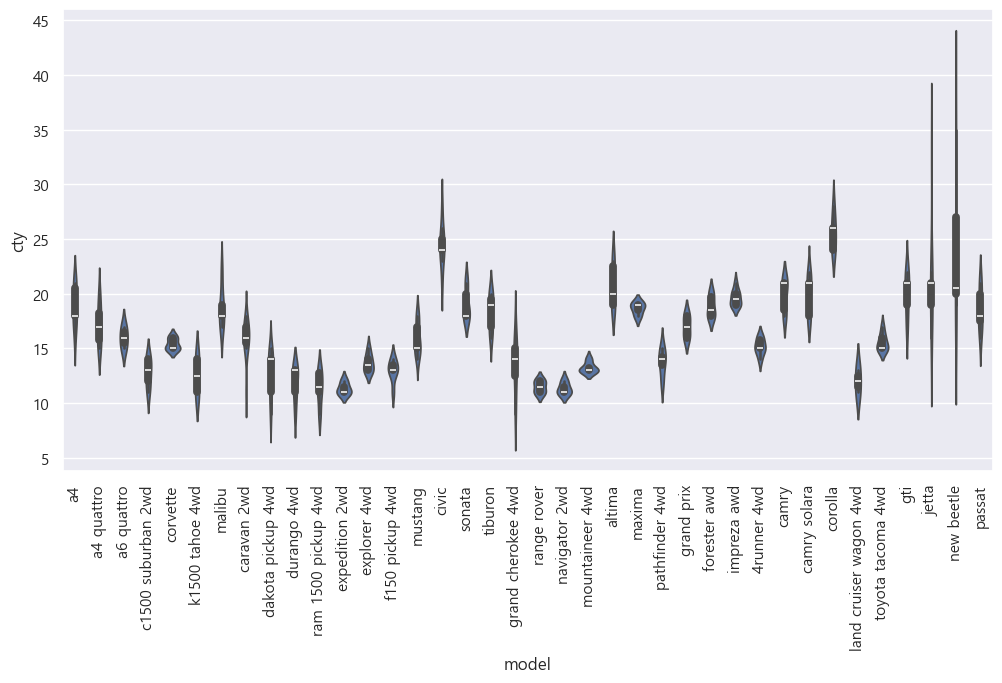

In [109]:
df1=mpg_df[['model','cty']]


sns.violinplot(x='model',y='cty',data=df1)
plt.xticks(rotation=90)
plt.show()


In [117]:
a=mpg_df[['manufacturer','hwy','cty']]
a.groupby('manufacturer').mean().sort_values('cty')

,hwy,cty
manufacturer,,
lincoln,17.000000,11.333333
land rover,16.500000,11.500000
dodge,17.945946,13.135135
mercury,18.000000,13.250000
jeep,17.625000,13.500000
ford,19.360000,14.000000
chevrolet,21.894737,15.000000
pontiac,26.400000,17.000000
audi,26.444444,17.611111


In [121]:
pd.set_option('display.max_rows', 10)
# 자동차 회사별 년도별 생산한 자동차의 종류수
mpg_a1 = mpg_df[['manufacturer', 'year', 'class']]

mpg_a2 = mpg_a1.groupby(['manufacturer', 'year']).count()
pd.set_option('display.max_rows', 10)
# 자동차 회사별 년도별 생산한 자동차의 종류수
mpg_a1 = mpg_df[['manufacturer', 'year', 'class']]

mpg_a1.columns = ['자동차회사', '제조년도', '종류']

mpg_a2 = mpg_a1.groupby(['자동차회사', '제조년도']).count()
mpg_a2
# seaborn으로 시각화 할 때는 필요한 데이터들은 컬럼으로 존재하는 것이 편하다
# group 함수를 사용할 때 as_index에 False를 넣어주거나
# reset_index 함수를 통해 index를 컬럼에 포함시켜준다.
mpg_a3 = mpg_a2.reset_index()
mpg_a3

,자동차회사,제조년도,종류
0,audi,1999,9
1,audi,2008,9
2,chevrolet,1999,7
3,chevrolet,2008,12
4,dodge,1999,16
...,...,...,...
25,subaru,2008,8
26,toyota,1999,20
27,toyota,2008,14
28,volkswagen,1999,16


In [129]:
mpg_a1 = mpg_df[['class', 'cty']]
mpg_a1.columns = ['자동차_종류', '도시연비']
mpg_a1
# 자동차 종류별 시내 연비 평균을 비교해본다.
mpg_a2 = mpg_a1.groupby('자동차_종류', as_index=False).mean()
type(mpg_a2)

pandas.core.frame.DataFrame